1. Основная часть

1.1. Чтение файла и загрузка данных.

Для первого набора данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
path = 'C:/Users/Алиса/Desktop/ГУАП/3 курс/1 семестр/Статистическая обработка информации/Лабораторная работа №2/LR2.xlsx'
df = pd.read_excel(path, header=None)
df_col1 = df.iloc[5:22, [0, 1, 2, 3, 4, 5]]
df_col1.columns = ['Федеральные земли', 'Количество процедур в общей сложности', 'Создание угрозы для детей связанной с острой опасностью', 'Создание угрозы для детей связанной со скрытым риском',
                   'Никого риска для благополучия ребенка нет, но есть нужда в помощи', 'Никого риска для благополучия ребенка нет и нет необходимости в помощи в дальнейшем']
df = df_col1.reset_index(drop=True)
df.head()

,Федеральные земли,Количество процедур в общей сложности,Создание угрозы для детей связанной с острой опасностью,Создание угрозы для детей связанной со скрытым риском,"Никого риска для благополучия ребенка нет, но есть нужда в помощи",Никого риска для благополучия ребенка нет и нет необходимости в помощи в дальнейшем
0,Баден-Вюртемберг,20059,3289,281,6631,7329
1,Бавария,20295,2621,2202,7285,8187
2,Берлин,20451,4281,4681,4751,6738
3,Бранденбург,7696,164,1184,2291,2581
4,Бремен,2701,458,200,874,1169


Преобразование типов данных к числовым данным.

In [2]:
for column in df.columns:
    if column != 'Федеральные земли':
        df[column] = df[column].astype(int)
df.dtypes


Федеральные земли                                                                      object
Количество процедур в общей сложности                                                   int64
Создание угрозы для детей связанной с острой опасностью                                 int64
Создание угрозы для детей связанной со скрытым риском                                   int64
Никого риска для благополучия ребенка нет, но есть нужда в помощи                       int64
Никого риска для благополучия ребенка нет и нет необходимости в помощи в дальнейшем     int64
dtype: object

Для второго набора данных

In [3]:
path1 = 'C:/Users/Алиса/Desktop/ГУАП/3 курс/1 семестр/Статистическая обработка информации/Лабораторная работа №2/LR2-1.xlsx'
df1 = pd.read_excel(path1, header=None)
df_col2 = df1.iloc[5:24, [0, 1, 2, 3, 4, 5]]
df_col2.columns = ['Федеральные земли', 'Группы с детьми  3 лет', 'Группы с детьми от 3 лет и до поступления в школу', 'Группы только для школьников',
                   'Смешанные возрастные группы без детей школьного возраста', 'Группы с детьми до и после начала обучения в школе']
df1 = df_col2.reset_index(drop=True)
df1.head()

,Федеральные земли,Группы с детьми 3 лет,Группы с детьми от 3 лет и до поступления в школу,Группы только для школьников,Смешанные возрастные группы без детей школьного возраста,Группы с детьми до и после начала обучения в школе
0,Баден-Вюртемберг,2.9,6.1,6.6,5.3,6
1,Бавария,3.6,7.3,5.6,4.7,7.2
2,Берлин,4.9,7.3,-,6.3,-
3,Бранденбург,4.8,8.9,11.6,6.9,9
4,Бремен,3.1,6.5,5.9,3.6,6.1


Преобразование данных.

In [4]:
for column1 in df1.columns:
    df1[column1] = df1[column1].replace('-', pd.NA)
mean_value1 = df1['Группы только для школьников'].mean()
mean_value2 = df1['Группы с детьми до и после начала обучения в школе'].mean()
df1['Группы только для школьников'] = df1['Группы только для школьников'].fillna(mean_value1)
df1['Группы с детьми до и после начала обучения в школе'] = df1['Группы с детьми до и после начала обучения в школе'].fillna(mean_value2)
df1.describe()

C:\Users\Алиса\AppData\Local\Temp\ipykernel_16048\1573771365.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Группы только для школьников'] = df1['Группы только для школьников'].fillna(mean_value1)
C:\Users\Алиса\AppData\Local\Temp\ipykernel_16048\1573771365.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Группы с детьми до и после начала обучения в школе'] = df1['Группы с детьми до и после начала обучения в школе'].fillna(mean_value2)


,Группы только для школьников,Группы с детьми до и после начала обучения в школе
count,19.000000,19.000000
mean,9.244444,7.888889
std,3.620501,1.604123
min,5.200000,5.700000
25%,6.000000,6.700000
50%,8.300000,7.800000
75%,11.050000,8.950000
max,16.000000,11.600000


Приведение к одному типу данных.

In [5]:
for column1 in df1.columns:
    if column1 != 'Федеральные земли':
        df1[column1] = df1[column1].astype(float)
df1.dtypes

Федеральные земли                                            object
Группы с детьми  3 лет                                      float64
Группы с детьми от 3 лет и до поступления в школу           float64
Группы только для школьников                                float64
Смешанные возрастные группы без детей школьного возраста    float64
Группы с детьми до и после начала обучения в школе          float64
dtype: object

1.3. Наглядное представление данных.

Для первой таблицы

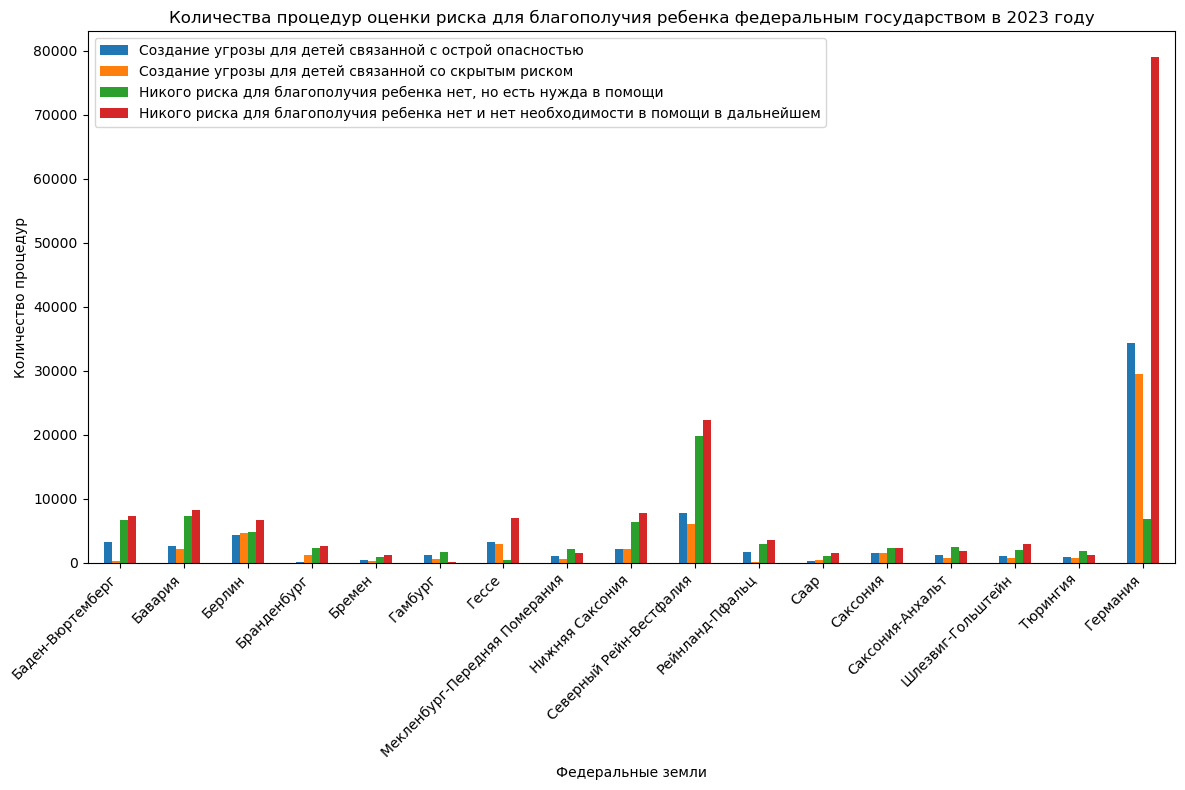

In [6]:
import matplotlib.pyplot as plt

categories = [
    'Создание угрозы для детей связанной с острой опасностью',
    'Создание угрозы для детей связанной со скрытым риском',
    'Никого риска для благополучия ребенка нет, но есть нужда в помощи',
    'Никого риска для благополучия ребенка нет и нет необходимости в помощи в дальнейшем'
]

df_plot = df.set_index('Федеральные земли')[categories].astype(int)

df_plot.plot(kind='bar', figsize=(12,8))
plt.ylabel('Количество процедур')
plt.title('Количества процедур оценки риска для благополучия ребенка федеральным государством в 2023 году')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Для второй таблицы.

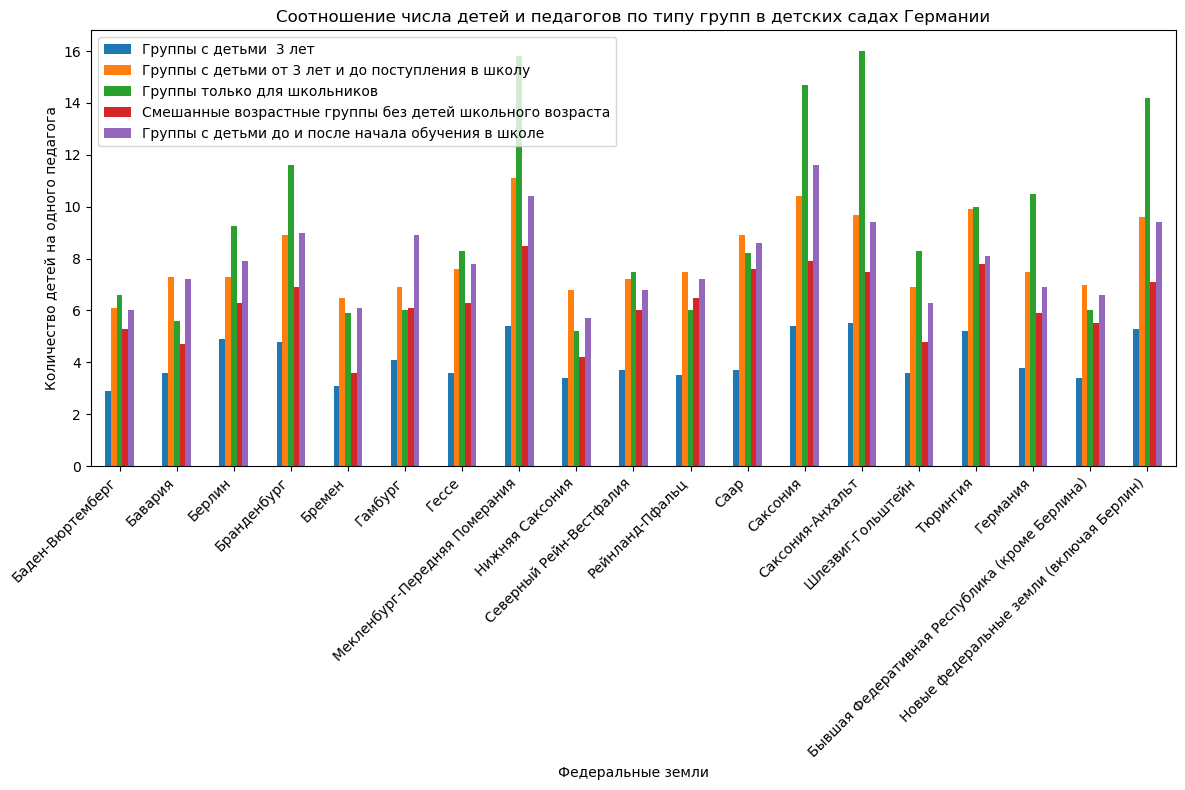

In [7]:
categories1 = ['Группы с детьми  3 лет', 'Группы с детьми от 3 лет и до поступления в школу', 'Группы только для школьников',
                   'Смешанные возрастные группы без детей школьного возраста', 'Группы с детьми до и после начала обучения в школе']

df_plot1 = df1.set_index('Федеральные земли')[categories1].astype(float)

df_plot1.plot(kind='bar', figsize=(12,8))
plt.ylabel('Количество детей на одного педагога')
plt.xlabel('Федеральные земли')
plt.title('Соотношение числа детей и педагогов по типу групп в детских садах Германии')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1.5. Применение каждого критерия

1.5.1. Критерий Шапиро-Уилка.

In [8]:
import scipy.stats as stts
stat, p = stts.shapiro(df['Никого риска для благополучия ребенка нет и нет необходимости в помощи в дальнейшем'])
print("Шапиро-Уилка:")
print(f'Статистика = {stat}, p-значение = {p:.10f}')
if p > 0.05:
    print('Гипотеза о нормальности генерального распределении не отвергается')
else:
    print('Гипотеза о нормальности генерального распределении отвергается')

Шапиро-Уилка:
Статистика = 0.4623101316521113, p-значение = 0.0000006305
Гипотеза о нормальности генерального распределении отвергается


1.5.2. Критерий корреляции Спирмена.

In [9]:
corr, p = stts.spearmanr(df['Никого риска для благополучия ребенка нет и нет необходимости в помощи в дальнейшем'], df['Никого риска для благополучия ребенка нет, но есть нужда в помощи'], axis=0, nan_policy='propagate', alternative='two-sided')
print("Корреляция Спирмена:")
print(f"Корреляция = {corr:.4f}, p-значение = {p:.4f}")
if p > 0.05:
    print("Гипотеза об отсутствии связи не отвергается")
else:
    print("Гипотеза об отсутствии связи отвергается")

Корреляция Спирмена:
Корреляция = 0.7721, p-значение = 0.0003
Гипотеза об отсутствии связи отвергается


1.5.3. Критерий Краскелла-Уоллиса.

In [10]:
stat, p = stts.kruskal(df['Создание угрозы для детей связанной с острой опасностью'], df['Создание угрозы для детей связанной со скрытым риском'], df['Никого риска для благополучия ребенка нет, но есть нужда в помощи'], df['Никого риска для благополучия ребенка нет и нет необходимости в помощи в дальнейшем'])

print("Критерий Краскелла-Уоллиса")
print(f"Статистика = {stat:.4f}, p-значение = {p:.4f}")

if p > 0.05:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям не отвергается")
else:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается")

Критерий Краскелла-Уоллиса
Статистика = 9.5846, p-значение = 0.0224
Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается


1.5.4. Критерий Манна-Уитни.

In [11]:
stat, p = stts.mannwhitneyu(df['Никого риска для благополучия ребенка нет и нет необходимости в помощи в дальнейшем'], df['Никого риска для благополучия ребенка нет, но есть нужда в помощи'], use_continuity=True, alternative='two-sided', method='auto',  nan_policy='propagate', keepdims=False)
print("Манна–Уитни (независимые выборки):")
print(f"Статистика = {stat:.4f}, p-значение = {p:.4f}")
if p > 0.05:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям не отвергается")
else:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается")

Манна–Уитни (независимые выборки):
Статистика = 167.0000, p-значение = 0.4486
Гипотеза о принадлежности выборок к однородным генеральным совокупностям не отвергается


2. Дополнительная часть.

2.1. Применение критериев к одним и тем же выбранным наборам данных

2.1.1. Критерий Шапиро-Уилка.

In [12]:
stat, p = stts.shapiro(df['Создание угрозы для детей связанной со скрытым риском'])
print("Шапиро-Уилка:")
print(f'Статистика = {stat}, p-значение = {p:.10f}')
if p > 0.05:
    print('Гипотеза о нормальности генерального распределении не отвергается')
else:
    print('Гипотеза о нормальности генерального распределении отвергается')

Шапиро-Уилка:
Статистика = 0.446368650090858, p-значение = 0.0000004693
Гипотеза о нормальности генерального распределении отвергается


2.1.2. Критерий корреляции Спирмена.

In [13]:
corr, p = stts.spearmanr(df['Создание угрозы для детей связанной со скрытым риском'], df['Никого риска для благополучия ребенка нет, но есть нужда в помощи'], axis=0, nan_policy='propagate', alternative='two-sided')
print("Корреляция Спирмена:")
print(f"Корреляция = {corr:.4f}, p-значение = {p:.4f}")
if p > 0.05:
    print("Гипотеза об отсутствии связи не отвергается")
else:
    print("Гипотеза об отсутствии связи отвергается")

Корреляция Спирмена:
Корреляция = 0.4363, p-значение = 0.0800
Гипотеза об отсутствии связи не отвергается


2.1.3. Критерий Краскелла-Уоллиса.

In [24]:
stat, p = stts.kruskal(df['Создание угрозы для детей связанной с острой опасностью'], df['Создание угрозы для детей связанной со скрытым риском'], df['Никого риска для благополучия ребенка нет, но есть нужда в помощи'], df['Никого риска для благополучия ребенка нет и нет необходимости в помощи в дальнейшем'])

print("Критерий Краскелла-Уоллиса")
print(f"Статистика = {stat:.4f}, p-значение = {p:.4f}")

if p > 0.05:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям не отвергается")
else:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается")

Критерий Краскелла-Уоллиса
Статистика = 9.5846, p-значение = 0.0224
Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается


2.1.4. Критерий Манна-Уитни.

In [15]:
stat, p = stts.mannwhitneyu(df['Создание угрозы для детей связанной со скрытым риском'], df['Никого риска для благополучия ребенка нет, но есть нужда в помощи'], use_continuity=True, alternative='two-sided', method='auto',  nan_policy='propagate', keepdims=False)
print("Манна–Уитни (независимые выборки):")
print(f"Статистика = {stat:.4f}, p-значение = {p:.4f}")
if p > 0.05:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям не отвергается")
else:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается")

Манна–Уитни (независимые выборки):
Статистика = 76.0000, p-значение = 0.0192
Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается


2.2. Применение других критериев к уже выбранным наборам данных

2.2.1. Критерий Кендалла.

In [16]:
tau, p = stts.kendalltau(df['Никого риска для благополучия ребенка нет и нет необходимости в помощи в дальнейшем'], df['Создание угрозы для детей связанной со скрытым риском'], nan_policy='propagate', method='auto', variant='b', alternative='two-sided')
print("Критерий Кендалла:")
print(f"τ = {tau:.4f}, p-значение = {p:.4f}")
if p > 0.05:
    print("Гипотеза об отсутствии зависимости не отвергается")
else:
    print("Гипотеза об отсутствии зависимости отвергается")


Критерий Кендалла:
τ = 0.4853, p-значение = 0.0060
Гипотеза об отсутствии зависимости отвергается


2.2.2. Медианный критерий.

In [17]:
stat, p, med, table = stts.median_test(df['Создание угрозы для детей связанной со скрытым риском'], df['Никого риска для благополучия ребенка нет, но есть нужда в помощи'], ties='below', correction=True, lambda_=1, nan_policy='propagate')
print("Медианный критерий:")
print(f"Статистика = {stat:.4f}, p-значение = {p:.4f}")
if p > 0.05:
    print("Гипотеза о принадлежности однородным генеральным совокупностям не отвергается")
else:
    print("Гипотеза о принадлежности однородным генеральным совокупностям отвергается")

Медианный критерий:
Статистика = 1.8824, p-значение = 0.1701
Гипотеза о принадлежности однородным генеральным совокупностям не отвергается


2.3. Определение критериев для дополнительных данных для проведения более полного исследования.

2.3.1. Критерий Шапиро-Уилка.

In [18]:
stat, p = stts.shapiro(df1['Группы с детьми  3 лет'])
print("Шапиро-Уилка:")
print(f'Статистика = {stat}, p-значение = {p:.10f}')
if p > 0.05:
    print('Гипотеза о нормальности генерального распределении не отвергается')
else:
    print('Гипотеза о нормальности генерального распределении отвергается')

Шапиро-Уилка:
Статистика = 0.8677514550361163, p-значение = 0.0132259788
Гипотеза о нормальности генерального распределении отвергается


2.3.2. Критерий корреляции Спирмена.

In [19]:
corr, p = stts.spearmanr(df1['Группы с детьми  3 лет'], df1['Группы с детьми от 3 лет и до поступления в школу'], axis=0, nan_policy='propagate', alternative='two-sided')
print("Корреляция Спирмена:")
print(f"Корреляция = {corr:.4f}, p-значение = {p:.10f}")
if p > 0.05:
    print("Гипотеза об отсутствии связи не отвергается")
else:
    print("Гипотеза об отсутствии связи отвергается")

Корреляция Спирмена:
Корреляция = 0.8272, p-значение = 0.0000124812
Гипотеза об отсутствии связи отвергается


2.3.3. Критерий Краскелла-Уоллиса.

In [26]:
stat, p = stts.kruskal(df1['Группы с детьми  3 лет'], df1['Группы с детьми от 3 лет и до поступления в школу'], df1['Группы только для школьников'], df1['Смешанные возрастные группы без детей школьного возраста'])

print("Критерий Краскелла-Уоллиса")
print(f"Статистика = {stat:.4f}, p-значение = {p:.10f}")

if p > 0.05:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям не отвергается")
else:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается")

Критерий Краскелла-Уоллиса
Статистика = 44.0672, p-значение = 0.0000000015
Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается


2.3.4. Критерий Манна-Уитни.

In [21]:
stat, p = stts.mannwhitneyu(df1['Группы с детьми  3 лет'], df1['Группы с детьми от 3 лет и до поступления в школу'], use_continuity=True, alternative='two-sided', method='auto',  nan_policy='propagate', keepdims=False)
print("Манна–Уитни (независимые выборки):")
print(f"Статистика = {stat:.14f}, p-значение = {p:.10f}")
if p > 0.05:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям не отвергается")
else:
    print("Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается")

Манна–Уитни (независимые выборки):
Статистика = 0.00000000000000, p-значение = 0.0000001455
Гипотеза о принадлежности выборок к однородным генеральным совокупностям отвергается


2.3.5. Критерий Кендалла.

In [22]:
tau, p = stts.kendalltau(df1['Группы с детьми  3 лет'], df1['Группы с детьми от 3 лет и до поступления в школу'], nan_policy='propagate', method='auto', variant='b', alternative='two-sided')
print("Критерий Кендалла:")
print(f"τ = {tau:.4f}, p-значение = {p:.4f}")
if p > 0.05:
    print("Гипотеза об отсутствии зависимости не отвергается")
else:
    print("Гипотеза об отсутствии зависимости отвергается")

Критерий Кендалла:
τ = 0.6807, p-значение = 0.0001
Гипотеза об отсутствии зависимости отвергается


2.3.6. Медианный критерий.

In [23]:
stat, p, med, table = stts.median_test(df1['Группы с детьми  3 лет'], df1['Группы с детьми от 3 лет и до поступления в школу'], ties='below', correction=True, lambda_=1, nan_policy='propagate')
print("Медианный критерий:")
print(f"Статистика = {stat:.4f}, p-значение = {p:.10f}")
if p > 0.05:
    print("Гипотеза о принадлежности однородным генеральным совокупностям не отвергается")
else:
    print("Гипотеза о принадлежности однородным генеральным совокупностям отвергается")

Медианный критерий:
Статистика = 34.1053, p-значение = 0.0000000052
Гипотеза о принадлежности однородным генеральным совокупностям отвергается
